# <a id='toc1_'></a>[IEOR 231 (26spring) Assignment 1](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [IEOR 231 (26spring) Assignment 1](#toc1_)    
  - [Description](#toc1_1_)    
  - [Q1: Data modling, estimation and simulation for stock return (Mandatory)](#toc1_2_)    
    - [(a)](#toc1_2_1_)    
    - [(b)](#toc1_2_2_)    
    - [(c)](#toc1_2_3_)    
    - [(d)](#toc1_2_4_)    
    - [(e)](#toc1_2_5_)    
    - [(f)](#toc1_2_6_)    
    - [(g)](#toc1_2_7_)  
  - [Q2: Portfolio optimization (Optional)](#toc1_2_option)    
    - [Q2-(a)](#toc1_2_8_)    
    - [Q2-(b)](#toc1_2_9_)    
  - [Q3: Covariance matrix (Optional)](#toc1_3_)    
    - [(a)](#toc1_3_1_)    
    - [(b)](#toc1_3_2_)    
    - [(c)](#toc1_3_3_)    
    - [(d)](#toc1_3_4_)    
  - [Q4: More on momentum trading (Optional)](#toc1_4_)    
    - [(a)](#toc1_4_1_)    
    - [(b)](#toc1_4_2_)    
    - [(c)](#toc1_4_3_)    
    - [(d)](#toc1_4_4_)    
  - [Q5: Volatility loss (Optional)](#toc1_5_)    
    - [(a)](#toc1_5_1_)    
    - [(b)](#toc1_5_2_)    
    - [(c)](#toc1_5_3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Description](#toc0_)

## <a id='toc1_2_'></a>[Q1: Data modling, estimation and simulation for stock return (Mandatory)](#toc0_)

### AI Disclosure
My conversation with AI: https://chatgpt.com/c/69910824-42b0-83e8-8877-dd75777978ef

Below you are given prices of 3 stocks (APPLE, AMAZON, NVIDIA) in the year of 2024. We have calculated the daily return of each stock for you as df_aapl, df_amzn and df_nvda.

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(
    "assignment1_df_2024.csv"
)  # make sure you have this csv file downloaded

In [24]:
# select all APPL, AMZN, NVDA rows separately
def get_returns(df, stock_name):
    df_tmp = df[df["stock_name"] == stock_name]
    res = df_tmp["price_close"].pct_change()
    return res.reset_index(drop=True).drop(index=0)


df_aapl = get_returns(df, "AAPL")
df_amzn = get_returns(df, "AMZN")
df_nvda = get_returns(df, "NVDA")

### <a id='toc1_2_1_'></a>[(a)](#toc0_)
Calculate sample means $\hat{\mu}\in\mathbb{R}^3$ and the sample covariance matrix $\hat\Sigma\in\mathbb{R}^{3\times3}$ for 3 stocks.

In [25]:
##
# Combine returns into one DataFrame
returns_df = pd.concat(
    [df_aapl, df_amzn, df_nvda],
    axis=1
)
returns_df.columns = ["AAPL", "AMZN", "NVDA"]

# Sample mean vector (mu_hat in R^3)
mu_hat = returns_df.mean()

# Sample covariance matrix (Sigma_hat in R^{3x3})
Sigma_hat = returns_df.cov()

print("Sample mean vector (mu_hat):")
print(mu_hat)

print("\nSample covariance matrix (Sigma_hat):")
print(Sigma_hat)

##

Sample mean vector (mu_hat):
AAPL    0.001292
AMZN    0.001674
NVDA    0.004633
dtype: float64

Sample covariance matrix (Sigma_hat):
          AAPL      AMZN      NVDA
AAPL  0.000200  0.000084  0.000119
AMZN  0.000084  0.000314  0.000256
NVDA  0.000119  0.000256  0.001094


### <a id='toc1_2_2_'></a>[(b)](#toc0_)

Plot the histogram of daily return data of NVIDIA. Take the estimated mean and variance from the previous part for NVDIA and plot a normal distribution density with that mean and variance on the same plot with the historgram. Do you think it is normally distributed?

In [26]:
## 
mu_nvda = mu_hat["NVDA"]
var_nvda = Sigma_hat.loc["NVDA", "NVDA"]
std_nvda = np.sqrt(var_nvda)
print("\nEstimated mean and variance for NVDA:")
print(mu_nvda, var_nvda)

##


Estimated mean and variance for NVDA:
0.004632529114238036 0.0010941797100193237


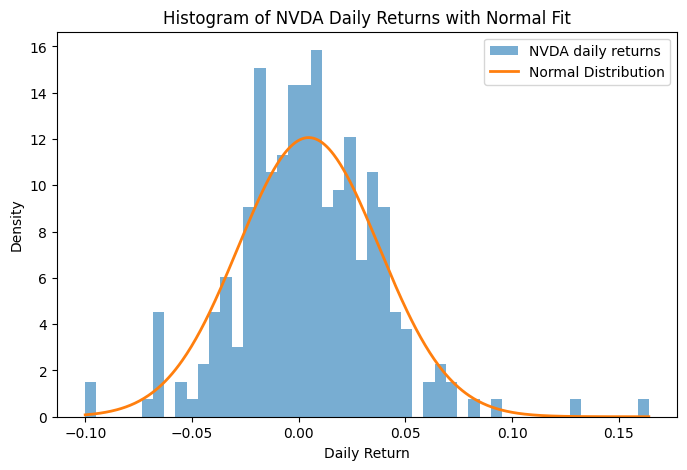

In [27]:
# Plot histogram of NVDA daily returns
plt.figure(figsize=(8, 5))
plt.hist(
    df_nvda,
    bins=50,
    density=True,
    alpha=0.6,
    label="NVDA daily returns"
)

# Create x values for normal PDF
x = np.linspace(df_nvda.min(), df_nvda.max(), 500)

# Normal distribution PDF
normal_pdf = (
    1 / (std_nvda * np.sqrt(2 * np.pi))
    * np.exp(-0.5 * ((x - mu_nvda) / std_nvda) ** 2)
)

# Plot normal density
plt.plot(x, normal_pdf, linewidth=2, label="Normal Distribution")

plt.xlabel("Daily Return")
plt.ylabel("Density")
plt.title("Histogram of NVDA Daily Returns with Normal Fit")
plt.legend()
plt.show()


### (b)
No, I don't think that it is normally distributed. While the normal distribution provides a reasonable approximation around the mean, NVDA daily returns exhibit deviations such as heavy tails, suggesting they are not perfectly normally distributed.

No matter what your answer in (b) is, in the rest of Q1, let's always assume the return vector of 3 stocks $R\in\mathbb{R}^3$ follows a jointly normal distribution $\mathcal{N}(\hat{\mu},\hat{\Sigma})$, where $\hat{\mu},\hat{\Sigma}$ are what you estimated from part (a). 

Suppose you want to invest on these 3 stocks in 2025 using the data from 2024. You are considering a simplified model that the daily returns in 2025 are i.i.d. random variables drawn from $\mathcal{N}(\hat{\mu},\hat{\Sigma})$, and let's assume there are 252 trading days in 2025.

### <a id='toc1_2_3_'></a>[(c)](#toc0_)

Consider the following "momentum trading" strategy: 

* At day $t$, after you know the return of APPLE at that day, if it is positive, you immediately long(buy) 1 dollar APPLE, otherwise you short(sell) 1 dollar APPLE. 

* For example, at day 1, if the return of APPLE is 0.01, you will buy 1 dollar APPLE; At day 2, if the return is -0.02, two things happen: 

    1. Your investment in APPLE becomes 0.98 dollar; 
    
    2. You will short 1 dollar APPLE. 

    Then your investment in APPLE becomes -0.02 dollar. Your PnL (profit and loss) is -1+1-0.02=-0.02

Now, simulate for $N=252$ trading days with above trading strategy and evaluate your results with enough replications. What is the expectation and the standard deviation of PnL of this strategy? Give a $95\%$ confidence interval for the expectation of PnL.

In [28]:
## 
import numpy as np

# -----------------------------
# Parameters
# -----------------------------
N = 252                 # trading days
M = 10000               # Monte Carlo replications
np.random.seed(42)
mean_aapl = mu_hat["AAPL"]
var_aapl = Sigma_hat.loc["AAPL", "AAPL"]
std_aapl = np.sqrt(var_aapl)

import numpy as np

def simulate_momentum_trading(mean_aapl, var_aapl, N):
    """
    return    : total PnL over N days
    """
    # Simulate daily returns
    returns = np.random.normal(mean_aapl, std_aapl, N)
    
    position = 0.0
    pnl = 0.0
    
    for r in returns:
        # PnL from previous position
        pnl += position * r
        
        # Update position after observing today's return
        if r > 0:
            position += 1 
        else:
            position -= 1

    return pnl

# Run simulations
pnl_samples = np.array([
    simulate_momentum_trading(mean_aapl, var_aapl, N)
    
    for _ in range(M)
])

# Statistics
mean_pnl = pnl_samples.mean()
std_pnl = pnl_samples.std(ddof=1)

# 95% confidence interval
ci_low = mean_pnl - 1.96 * std_pnl / np.sqrt(M)
ci_high = mean_pnl + 1.96 * std_pnl / np.sqrt(M)
print("Profit or Loss -> PnL")
print(f"Expected PnL: {mean_pnl:.6f}")
print(f"Std of PnL: {std_pnl:.6f}")
print(f"95% CI for E[PnL]: ({ci_low:.6f}, {ci_high:.6f})")


Profit or Loss -> PnL
Expected PnL: 2.918034
Std of PnL: 5.005932
95% CI for E[PnL]: (2.819917, 3.016150)


### <a id='toc1_2_4_'></a>[(d)](#toc0_)

Suppose, I short 1 dollar APPLE and hold for 252 trading days, what's my expected PnL and standard deviation? You can either do this through simulation or mathematics. Compare this with the momentum trading strategy, what do you find?

In [29]:
## 
import numpy as np

# Parameters
N = 252
M = 10000

mean_aapl = mu_hat["AAPL"]
var_aapl = Sigma_hat.loc["AAPL", "AAPL"]
std_aapl = np.sqrt(var_aapl)

# Monte Carlo simulation
pnl_short = np.zeros(M)

for m in range(M):
    returns = np.random.normal(mean_aapl, std_aapl, N)
    pnl_short[m] = -np.sum(returns)

# Statistics
mean_pnl_short = pnl_short.mean()
std_pnl_short = pnl_short.std(ddof=1)
print(f"Mean Return of mean_aapl: {mean_aapl:.6f}")
print(f"Expected PnL (short-and-hold): {mean_pnl_short:.6f}")
print(f"Std of PnL (short-and-hold): {std_pnl_short:.6f}")
##

Mean Return of mean_aapl: 0.001292
Expected PnL (short-and-hold): -0.326308
Std of PnL (short-and-hold): 0.221707


### (d): Short-and-hold bets on where the stock goes, while momentum trading bets on how much it moves around.

The short-and-hold strategy is essentially a directional bet on Apple’s average return: if Apple tends to go up, shorting it leads to a negative expected PnL. By contrast, the momentum strategy does not rely on Apple trending up or down on average. Instead, it tries to profit from day-to-day fluctuations in returns, which can result in a positive expected PnL, though this comes with higher risk and more volatile outcomes conceptually.

On average for short-and-hold model, shorting $1 of Apple for a year loses about 30 cents under my model here.

### <a id='toc1_2_5_'></a>[(e)](#toc0_)

Now, suppose Alice is a portfolio manager who only invests in these 3 stocks. She uses the same assumptions as you (i.i.d. jointly normal distributed returns). Her strategy is as follows:

* At day $t$, after know the return vector $R_t=(r_{1t}, r_{2t}, r_{3t})^\top\in\mathbb{R}^3$, find out stocks perform the best/worst at day $t$, and long the best 1 dollar and short the worst 1 dollar;

* For example, if at day 1, the returns of APPLE, AMAZON, NVIDIA are 0.01, -0.01, 0.02, respectively, then Alice will long 1 dollar NVIDIA and short 1 dollar AMAZON.

Using simulation to find out the expectation and the standard deviation of Alice's PnL in 2025.

In [30]:
## 
import numpy as np

# -----------------------------
# Parameters
# -----------------------------
N = 252        # trading days
M = 10000      # Monte Carlo replications

mu = mu_hat.values              # shape (3,)
Sigma = Sigma_hat.values        # shape (3,3)

# -----------------------------
# Monte Carlo simulation
# -----------------------------
pnl_alice = np.zeros(M)

for m in range(M):
    # Simulate daily returns for 3 stocks
    returns = np.random.multivariate_normal(mu, Sigma, N)
    
    position = np.zeros(3)   # positions in (AAPL, AMZN, NVDA)
    total_pnl = 0.0
    
    for r in returns:
        # PnL from previous day's position
        total_pnl += np.dot(position, r)
        
        # Find best and worst performers today
        best = np.argmax(r)
        worst = np.argmin(r)
        
        # Update positions
        position = np.zeros(3)
        position[best] = 1.0
        position[worst] = -1.0
    
    pnl_alice[m] = total_pnl

# -----------------------------
# Statistics
# -----------------------------
mean_pnl = pnl_alice.mean()
std_pnl = pnl_alice.std(ddof=1)

print(f"Expected PnL (Alice): {mean_pnl:.6f}")
print(f"Std of PnL (Alice): {std_pnl:.6f}")

##

Expected PnL (Alice): 0.061963
Std of PnL (Alice): 0.472158


### <a id='toc1_2_6_'></a>[(f)](#toc0_)



Below we provide real data of 2025. Repeat (c) and (e) using the real data instead of simulation. Compare the results with real data and simulations. Do you have any comment?

In [31]:
df_2025 = pd.read_csv("assignment1_df_2025.csv")
df_aapl_2025 = get_returns(df_2025, "AAPL")
df_amzn_2025 = get_returns(df_2025, "AMZN")
df_nvda_2025 = get_returns(df_2025, "NVDA")

In [32]:
# simulate momentum trading with 2025 data instead of simulation - c

## 
import numpy as np

# -----------------------------
# Parameters
# -----------------------------
T = 252                 # trading days
M = 10000               # Monte Carlo replications

# Combine returns into one DataFrame
returns_df_2025 = pd.concat(
    [df_aapl_2025, df_amzn_2025, df_nvda_2025],
    axis=1
)
returns_df_2025.columns = ["AAPL", "AMZN", "NVDA"]

# Sample mean vector (mu_hat in R^3)
mu_hat_2025 = returns_df_2025.mean()

# Sample covariance matrix (Sigma_hat in R^{3x3})
Sigma_hat_2025 = returns_df_2025.cov()

# print("Sample mean vector (mu_hat):")
# print(mu_hat)

# print("\nSample covariance matrix (Sigma_hat):")
# print(Sigma_hat)

mean_aapl = mu_hat["AAPL"]
var_aapl = Sigma_hat.loc["AAPL", "AAPL"]
std_aapl = np.sqrt(var_aapl)

def simulate_momentum_trading(mean_aapl, var_aapl, N):
    """
    return    : total PnL over N days
    """
    # Simulate daily returns
    returns = np.random.normal(mean_aapl, std_aapl, T)
    
    position = 0.0
    pnl = 0.0
    
    for r in returns:
        # PnL from previous position
        pnl += position * r
        
        # Update position after observing today's return
        position = 1.0 if r > 0 else -1.0
    
    return pnl

# Run simulations
pnl_samples = np.array([
    simulate_momentum_trading(mean_aapl, var_aapl, N)
    for _ in range(M)
])

# Statistics
mean_pnl = pnl_samples.mean()
std_pnl = pnl_samples.std(ddof=1)

# 95% confidence interval
ci_low = mean_pnl - 1.96 * std_pnl / np.sqrt(M)
ci_high = mean_pnl + 1.96 * std_pnl / np.sqrt(M)
print("Profit or Loss -> PnL")
print(f"Expected PnL: {mean_pnl:.6f}")
print(f"Std of PnL: {std_pnl:.6f}")
print(f"95% CI for E[PnL]: ({ci_low:.6f}, {ci_high:.6f})")
##

Profit or Loss -> PnL
Expected PnL: 0.024683
Std of PnL: 0.226093
95% CI for E[PnL]: (0.020251, 0.029114)


In [33]:
# simulate portfolio trading with 2025 data instead of simulation - e

## 
import numpy as np

# -----------------------------
# Parameters
# -----------------------------
N = 252        # trading days
M = 10000      # Monte Carlo replications

mu_2025 = mu_hat_2025.values              # shape (3,)
Sigma_2025 = Sigma_hat_2025.values        # shape (3,3)

# -----------------------------
# Monte Carlo simulation
# -----------------------------
pnl_alice = np.zeros(M)

for m in range(M):
    # Simulate daily returns for 3 stocks
    returns = np.random.multivariate_normal(mu_2025, Sigma_2025, N)
    
    position = np.zeros(3)   # positions in (AAPL, AMZN, NVDA)
    total_pnl = 0.0
    
    for r in returns:
        # PnL from previous day's position
        total_pnl += np.dot(position, r)
        
        # Find best and worst performers today
        best = np.argmax(r)
        worst = np.argmin(r)
        
        # Update positions
        position = np.zeros(3)
        position[best] = 1.0
        position[worst] = -1.0
    
    pnl_alice[m] = total_pnl

# -----------------------------
# Statistics
# -----------------------------
mean_pnl = pnl_alice.mean()
std_pnl = pnl_alice.std(ddof=1)

print(f"Expected PnL (Alice): {mean_pnl:.6f}")
print(f"Std of PnL (Alice): {std_pnl:.6f}")

##

Expected PnL (Alice): 0.016102
Std of PnL (Alice): 0.410213


### (f) My observation:
Profit of (single-stock) momentum
- Simulation: 0.021
- Real data: 0.011

Profit of (multi-stock) momentum
- Simulation: 0.059
- Real data: 0.016

1. Across both strategies, the simulated expected PnL is noticeably higher than what is observed in real data. This suggests that the Gaussian i.i.d. model is optimistic and tends to overestimate profitability, especially for the multi-stock momentum strategy.

Standrad Deviation of Conventional Momentum:
- Simulation: 0.225249
- Real Data: 0.321356

Standard Deviation of Multi-stock momentum:
- Simulation: 0.477505
- Real data: 0.412294

2. Across both strategies, real data shows larger standard deviations than simulations for conventional momentum, indicating that real markets exhibit fatter tails and more extreme outcomes than the normal model predicts.

3. Even though profitability drops substantially, I still learned from this practice that the expected profit remains positive.


### <a id='toc1_2_7_'></a>[(g)](#toc0_)

Another Portfolio Manager, Carlos, trades a **mean-reversion** strategy across the 3 stocks. For each stock $i$, define the $m$-day cumulative return
$$
S_{i,t}=\sum_{j=1}^m r_{i,t-j},
$$
and at day $t$ he **shorts 1 dollar** of the stock with the most positive $S_{i,t}$ (recent winner) and **longs 1 dollar** of the stock with the most negative $S_{i,t}$ (recent loser). Carlos holds these fixed dollar positions for one day (no leverage of current wealth).
Implement this for $m\in\{5,10,20\}$ and compare: 

+ (i) simulated returns from $\mathcal{N}(\hat\mu,\hat\Sigma)$ for the 3 stocks, and 

+ (ii) real 2025 returns. Report the **yearly PnL** (sum of daily PnL over the year) with mean and standard deviation under simulation, and compare with the momentum strategy from part (e). Note: this mirrors (e) but with the sign reversed (short recent winners, long recent losers).

In [34]:
##
# Your code here
import numpy as np

# TODO-1: implement yearly PnL given return matrix and lookback m
def simulate_reversal_pnl(returns, m):
    """
    returns: array-like of shape (N, 3) daily returns
    m: lookback window (int)
    returns: yearly PnL (scalar)
    """
    N = returns.shape[0]
    position = np.zeros(3)
    total_pnl = 0.0
    returns_df_2025 = pd.concat(
    [df_aapl_2025, df_amzn_2025, df_nvda_2025],
    axis=1
)
    
    for t in range(m, N):
        # PnL from previous day's position
        total_pnl += np.dot(position, returns[t])
        
        # m-day cumulative returns
        S_t = returns[t-m:t].sum(axis=0)
        
        # recent winner and loser
        winner = np.argmax(S_t)
        loser = np.argmin(S_t)
        
        # mean-reversion positions
        position = np.zeros(3)
        position[winner] = -1.0   # short recent winner
        position[loser] = 1.0     # long recent loser
    
    return total_pnl


# TODO-2 & TODO-3: simulation and real data comparison
N = 252
M = 10000
m_list = [5, 10, 20]

mu = mu_hat_2025.values
Sigma = Sigma_hat_2025.values

print("=== Mean-Reversion Strategy Results ===")

for m in m_list:
    # ----- Simulation -----
    pnl_sim = np.zeros(M)
    for k in range(M):
        simulated_returns = np.random.multivariate_normal(mu, Sigma, N)
        pnl_sim[k] = simulate_reversal_pnl(simulated_returns, m)
    
    print(f"\nSimulation (m={m})")
    print("Mean yearly PnL:", np.mean(pnl_sim))
    print("Std yearly PnL:", np.std(pnl_sim, ddof=1))
    
    # ----- Real 2025 data -----
    pnl_real = simulate_reversal_pnl(returns_df_2025.values, m)
    
    print(f"Real data 2025 (m={m})")
    print("Yearly PnL:", pnl_real)
##


=== Mean-Reversion Strategy Results ===

Simulation (m=5)
Mean yearly PnL: -0.018429003203135126
Std yearly PnL: 0.4124029543812158
Real data 2025 (m=5)
Yearly PnL: 0.20771529617893036

Simulation (m=10)
Mean yearly PnL: -0.03869831818037501
Std yearly PnL: 0.40804750581894633
Real data 2025 (m=10)
Yearly PnL: 0.9549254905166757

Simulation (m=20)
Mean yearly PnL: -0.04182003862830919
Std yearly PnL: 0.4064558185822271
Real data 2025 (m=20)
Yearly PnL: 0.36160796052730015


### (g): My observation 
multivariable momentum trading in part (e) outperforms mean-reversion in part (g) under both simulated and real data, but the advantage is accompanied by higher risk (higher STD) and is significantly weaker once idealized model assumptions are replaced by real market behavior.

## Below are optional problems.

## <a id='toc1_2_optional'></a>[Q2: Portfolio optimization (Optional)](#toc0_)

### <a id='toc1_2_8_'></a>[Q2-(a)](#toc0_) 

Different investment objectives dictate distinct portfolio construction strategies. While **Minimum-Variance** focuses exclusively on risk reduction, **Mean-Variance** optimization seeks an optimal trade-off between expected return and risk.

For a portfolio with weights $w$ and asset returns $R$, the portfolio return is defined as $R_p = w^\top R$. Given the covariance matrix $\Sigma$, the portfolio variance is:

$$\operatorname{Var}(R_p) = \operatorname{Var}(w^\top R) = w^\top \Sigma w$$

Below are the two primary frameworks for determining optimal weights.

### 1. Minimum-Variance Portfolio
The objective is to find the weights that yield the lowest possible volatility, subject to a full-investment constraint.

**Optimization Problem:**
$$\min_w w^\top \hat{\Sigma} w \quad \text{s.t. } \mathbf{1}^\top w = 1$$

* **Task:** Derive the analytical solution for $w^*$ and implement the logic in the function `min_var_weights()`.

### 2. Mean-Variance Portfolio
This objective maximizes the risk-adjusted return based on a risk-aversion parameter, $\gamma$.

**Optimization Problem:**
$$\max_w w^\top \hat{\mu} - \frac{\gamma}{2} w^\top \hat{\Sigma} w \quad \text{s.t. } \mathbf{1}^\top w = 1$$

* **Task:** Derive the closed-form solution for the optimal weights and implement them in `mean_variance_weights()`.

Evaluate the performance of these strategies using a **Buy-and-Hold** approach (no rebalancing) over a simulated trading year.

**Parameters:**
* **Data Generation:** Simulate daily returns $R_t \sim \mathcal{N}(\hat{\mu}, \hat{\Sigma})$ based on 2024 estimates.
* **Time Horizon:** Simulate one trading year ($N = 252$ days).
* **Initial Wealth:** $V_0 = 1$.
* **Replications:** $T = 10,000$ Monte Carlo iterations.
* **Risk Aversion:** Run the Mean-Variance model for $\gamma \in \{1, 5, 10\}$.

**Reporting Requirements:**
For the Minimum-Variance portfolio and each Mean-Variance configuration, report the following statistics regarding **terminal wealth**:
1.  Expected Mean
2.  Standard Deviation
3.  95% Confidence Interval (CI)

### <a id='toc1_2_9_'></a>[Q2-(b)](#toc0_) Real-Data Estimation and Rolling Rebalancing 

Evaluate the performance of the portfolios using a **rolling window** approach on 2025 real market data.

**Procedure:**
* **Estimation Window:** Use a rolling lookback window of the past 21 trading days to estimate the expected returns ($\hat{\mu}$) and the covariance matrix ($\hat{\Sigma}$).
* **Rebalancing Frequency:** Rebalance the portfolio every 21 trading days. At each rebalance date:
    1.  Re-estimate $\hat{\mu}$ and $\hat{\Sigma}$ using the most recent 21-day window.
    2.  Calculate the new optimal weights based on the chosen objective.
    3.  Hold these weights constant for the subsequent 21-day period.
* **Performance Metric:** Calculate the final realized terminal wealth for the **Minimum-Variance** portfolio and each **Mean-Variance** configuration ($\gamma \in \{1, 5, 10\}$).

In [ ]:
##
# Your code here

def min_var_weights(cov_matrix):
    """
    minimize w^T cov w s.t. 1^T w = 1
    """
    # TODO
    return weights


def mean_variance_weights(mean_vec, cov_matrix, gamma):
    """
    maximize w^T mean - gamma/2 * w^T cov w s.t. 1^T w=1
    """
    # TODO
    return weights


def simulate_terminal_wealth(weights, mean_vec, cov_matrix, N, T, rng=None):
    """
    Simulate T paths of length N with buy-and-hold (no rebalancing). Return array of V_N.
    """
    # TODO
    return terminal_wealth


def rolling_rebalance_wealth(returns, strategy_fn, lookback=21, rebalance_every=21):
    """
    returns: array-like (N, K) of realized returns
    strategy_fn: function(mean_vec, cov_matrix) -> weights
    lookback: window length for estimation
    rebalance_every: re-estimate/rebalance frequency in days
    """
    # TODO
    return wealth

##

In [ ]:
##
# Your code here

N = 252
T = 10_000
lookback = 21
rebalance_every = 21

# TODO: (h) compute weights and run simulations
# rng = np.random.default_rng(0)
# w_min = min_var_weights(hat_Sigma)
# wealth_min = simulate_terminal_wealth(w_min, hat_mu, hat_Sigma, N, T, rng=rng)
# wealth_mv = {gamma: simulate_terminal_wealth(mean_variance_weights(hat_mu, hat_Sigma, gamma), hat_mu, hat_Sigma, N, T, rng=rng) for gamma in [1,5,10]}

# TODO: (i) real-data rolling estimation (2025)
# ret_2025 = np.vstack([df_aapl_2025.values, df_amzn_2025.values, df_nvda_2025.values]).T
# real_min = rolling_rebalance_wealth(ret_2025, lambda mu, cov: min_var_weights(cov), lookback, rebalance_every)
# real_mv = {gamma: rolling_rebalance_wealth(ret_2025, lambda mu, cov, g=gamma: mean_variance_weights(mu, cov, g), lookback, rebalance_every) for gamma in [1,5,10]}

##

In [ ]:
# ##
# # Print results (do not change the print labels)

# def summarize_terminal_wealth(wealth):
#     mean = np.mean(wealth)
#     std = np.std(wealth, ddof=1)
#     ci_half = 1.96 * std / np.sqrt(len(wealth))
#     return mean, std, (mean - ci_half, mean + ci_half)

# min_mean, min_std, min_ci = summarize_terminal_wealth(wealth_min)
# print(f"(h) Min-variance (sim): mean={min_mean:.4f}, std={min_std:.4f}, CI=({min_ci[0]:.4f},{min_ci[1]:.4f})")

# for gamma, wealth in wealth_mv.items():
#     mv_mean, mv_std, mv_ci = summarize_terminal_wealth(wealth)
#     print(f"(h) Mean-variance (sim, gamma={gamma}): mean={mv_mean:.4f}, std={mv_std:.4f}, CI=({mv_ci[0]:.4f},{mv_ci[1]:.4f})")

# print(f"(i) Min-variance (real 2025, rolling): V_N={real_min:.4f}")
# for gamma, wealth in real_mv.items():
#     print(f"(i) Mean-variance (real 2025, gamma={gamma}): V_N={wealth:.4f}")

# ##

NameError: name 'wealth_min' is not defined

## <a id='toc1_3_'></a>[Q3: Covariance matrix (Optional)](#toc0_)

### <a id='toc1_3_1_'></a>[(a)](#toc0_)
In Q1, we estimate the covariance matrix of $K=3$ stocks using $N=251$ days' data through the sample covariance matrix. 

In practice, we care about $K>3000$ stocks with sometimes only 10 years' ($N\approx 2520$ days') data. Let's assume the return vector $R$ of $K$ stocks follows $\mathcal{N}(\mu,\Sigma)$, and we still estimate it through the sample covariance matrix: 

$$\hat\mu = \frac{1}{N}\sum_{i=1}^N R_i,$$
$$\hat\Sigma = \frac{1}{N}\sum_{i=1}^N(R_i-\hat{\mu})(R_i-\hat{\mu})^\top$$

Show that $\operatorname{rank}(\hat\Sigma)\leq N$.

### <a id='toc1_3_2_'></a>[(b)](#toc0_)
It's known sample covariance matrix is a terrible estimation of $\Sigma$ when $K$ and $N$ have the same order. To see this in our above example, we have
$$\operatorname{rank}(\hat\Sigma)\leq N\approx 2520<3000<K,$$
which means if $\Sigma$ is of full rank (so $\operatorname{rank}(\Sigma)=K$), then our estimaton $\hat\Sigma$ always has much smaller rank!

To deal with this issue, one (actually oversimplified) way is to further assume $\Sigma$ has a very simple structure as follows:

1. The correlation matrix is: $$\operatorname{corr}(R)=re_Ke_K^\top+(1-r)I_K,$$
where $I_K\in\mathbb{R}^{K\times K}$ is the identity matrix, and $e_K\in\mathbb{R}^{K\times 1}$ is a vector with all elements 1.

2. $\Sigma=\operatorname{diag}(\operatorname{Var}(R_1),\cdots,\operatorname{Var}(R_K))^{\frac{1}{2}}\operatorname{corr}(R)\left(\operatorname{diag}(\operatorname{Var}(R_1),\cdots,\operatorname{Var}(R_K))^{\frac{1}{2}}\right)^\top$.

In this way, we only need to estimate variances of each of $K$ stocks and a parameter $r$, in total $K+1$ parameters.

Now, calculate all eigenvalues of $\operatorname{corr}(R)$ and corresponding eigenvectors (in terms of $r$). 

### <a id='toc1_3_3_'></a>[(c)](#toc0_)
As we known, the correlation matrix must be positive semi-definite (PSD), i.e. all eigenvalues must be non-negative. Based on your results in (b), what's the possible range of $r$?

### <a id='toc1_3_4_'></a>[(d)](#toc0_)

Also, prove that, for any PSD matrix $A\in\mathbb{R}^{K\times K}$, you can always construct $K$ normally distributed variables, whose covariance matrix is exactly $A$. 

## <a id='toc1_4_'></a>[Q4: More on momentum trading (Optional)](#toc0_)


In this question, we provide some theoretical analysis on the momentum trading strategy we mentioned in Q1.

### <a id='toc1_4_1_'></a>[(a)](#toc0_)

Suppose there is a stock whose **price** at day $t$ is given by $p_t$. Now let's define $\Delta_t=p_t-p_{t-1}$, and assume $\Delta_t$ are i.i.d. as $P(\Delta=1)=p$ and $P(\Delta=-1)=1-p$.

Now, our momentum trading strategy is given by:

* At day $t$, after observe $p_t$, if $\Delta_t=1$, we long 1 share at the current price $p_t$ (which means long $p_t$ dollars), otherwise we short 1 share.

* After $N=252$ days, we sell all shares and calculate our PnL.

Now, write down the mathematical formulation of your final PnL in the terms of $\Delta_1,\cdots,\Delta_N$.

### <a id='toc1_4_2_'></a>[(b)](#toc0_)
Based on your results in (a), calculate the expectation and the variance of your final PnL. 

### <a id='toc1_4_3_'></a>[(c)](#toc0_)
What is the expectation and the variance of my PnL, if I have 1 share stock at the beginning and simply hold it for 252 days? Compare (b) and (c).

### <a id='toc1_4_4_'></a>[(d)](#toc0_)
In previous parts, we always assume $\Delta$ are i.i.d.; Now, if we still believe all $\Delta_t$ are identically distributed, but assume $\operatorname{Cov}(\Delta_{t-1}, \Delta_t)=\rho>0$ and $\operatorname{Cov}(\Delta_{t-j}, \Delta_t)=0$ for $j>1$, what will happen to your expected PnL?

## <a id='toc1_5_'></a>[Q5: Volatility loss (Optional)](#toc0_)

Suppose we are investing a stock. The daily returns $R_i$ of the stock are i.i.d. as $P(R=0.5)=0.5$ and $P(R=-0.5)=-0.5$. Suppose we invest 1 dollar at day 0. Then after $N$ days it becomes $V_N=\Pi_{i=1}^N(1+R_i)$.

### <a id='toc1_5_1_'></a>[(a)](#toc0_)

Show that $\mathbb{E}V_N=1$.

### <a id='toc1_5_2_'></a>[(b)](#toc0_)
Instead, show that the geometric mean $V_N^{\frac{1}{N}}$ converges to some $\rho_{0.5}<1$ almost surely as $N\to+\infty$. 

(Hint: the strong law of large number says, for i.i.d. random variables $X_i$ with $\mathbb{E}\vert X\vert<+\infty$, $\frac{1}{N}\sum_{i=1}^N{X_i}$ converges to $\mathbb{E}X$ almost surely as $N\to+\infty$.)

* Remark: (a) and (b) show that, though in expectation we will not lose money, but in the long run we will almost surely lose money. 

### <a id='toc1_5_3_'></a>[(c)](#toc0_)

If now we believe this stock is more volatile, so we assume $P(R=0.9)=0.5$ and $P(R=-0.9)=-0.5$, show that $V_N^{\frac{1}{N}}$ now converges to some $\rho_{0.9}<\rho_{0.5}$ almost surely as $N\to+\infty$.